# Diabetes Dataset Description

## Overview
Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.
This notebook provides a brief overview of the diabetes dataset sourced from the "diabetes_012_health_indicators_BRFSS2015.csv" file. The dataset encompasses various health indicators related to diabetes and associated factors. The columns in the dataset are as follows:

| Column                   | Description                                            |
|--------------------------|--------------------------------------------------------|
| Diabetes_012             | Binary indicator for the presence of diabetes (0 or 1).|
| HighBP                   | Binary indicator for high blood pressure (0 or 1).     |
| HighChol                 | Binary indicator for high cholesterol (0 or 1).        |
| CholCheck                | Binary indicator for cholesterol check (0 or 1).       |
| BMI                      | Body Mass Index (numeric).                              |
| Smoker                   | Binary indicator for smoking status (0 or 1).           |
| Stroke                   | Binary indicator for history of stroke (0 or 1).       |
| HeartDiseaseorAttack     | Binary indicator for history of heart disease or heart attack (0 or 1). |
| PhysActivity             | Binary indicator for physical activity (0 or 1).       |
| Fruits                   | Numeric indicator for daily fruit consumption.         |
| ... (and more)           | Additional health-related columns.                      |
| AnyHealthcare            | Binary indicator for access to any healthcare (0 or 1). |
| NoDocbcCost              | Binary indicator for no doctor due to cost (0 or 1).    |
| GenHlth                  | Numeric indicator for general health status.            |
| MentHlth                 | Numeric indicator for mental health status.             |
| PhysHlth                 | Numeric indicator for physical health status.           |
| DiffWalk                 | Binary indicator for difficulty in walking (0 or 1).    |
| Sex                      | Binary indicator for gender (0 for Male, 1 for Female).|
| Age                      | Numeric indicator for age.                             |
| Education                | Numeric indicator for education level.                  |
| Income                   | Numeric indicator for income level.                     |


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
# reading data-2.csv into pandas df
df = pd.read_csv("Dataset/diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
# description of numeric values of df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [8]:
# looking for duplicate records in df
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
1242             2.0     1.0       1.0        1.0  27.0     1.0     0.0   
1563             0.0     0.0       0.0        1.0  21.0     1.0     0.0   
2700             0.0     0.0       0.0        1.0  32.0     0.0     0.0   
3160             0.0     0.0       0.0        1.0  21.0     0.0     0.0   
3332             0.0     0.0       0.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253492           2.0     1.0       1.0        1.0  33.0     0.0     0.0   
253550           0.0     0.0       0.0        1.0  25.0     0.0     0.0   
253563           0.0     0.0       1.0        1.0  24.0     1.0     0.0   
253597           0.0     0.0       0.0        1.0  24.0     0.0     0.0   
253638           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
1242                     

In [9]:
# dropping duplicate records from df
df.drop_duplicates(inplace=True)
df.shape

(229781, 22)

In [10]:
# print null values of each column
missing_values = pd.concat([df.isnull().sum(), (df.isnull().sum() / len(df) * 100)], axis=1, keys=['Missing Values', '% Missing']).sort_values(by='Missing Values', ascending=False)
print(missing_values)

                      Missing Values  % Missing
Diabetes_012                       0        0.0
HighBP                             0        0.0
Education                          0        0.0
Age                                0        0.0
Sex                                0        0.0
DiffWalk                           0        0.0
PhysHlth                           0        0.0
MentHlth                           0        0.0
GenHlth                            0        0.0
NoDocbcCost                        0        0.0
AnyHealthcare                      0        0.0
HvyAlcoholConsump                  0        0.0
Veggies                            0        0.0
Fruits                             0        0.0
PhysActivity                       0        0.0
HeartDiseaseorAttack               0        0.0
Stroke                             0        0.0
Smoker                             0        0.0
BMI                                0        0.0
CholCheck                          0    

<Axes: >

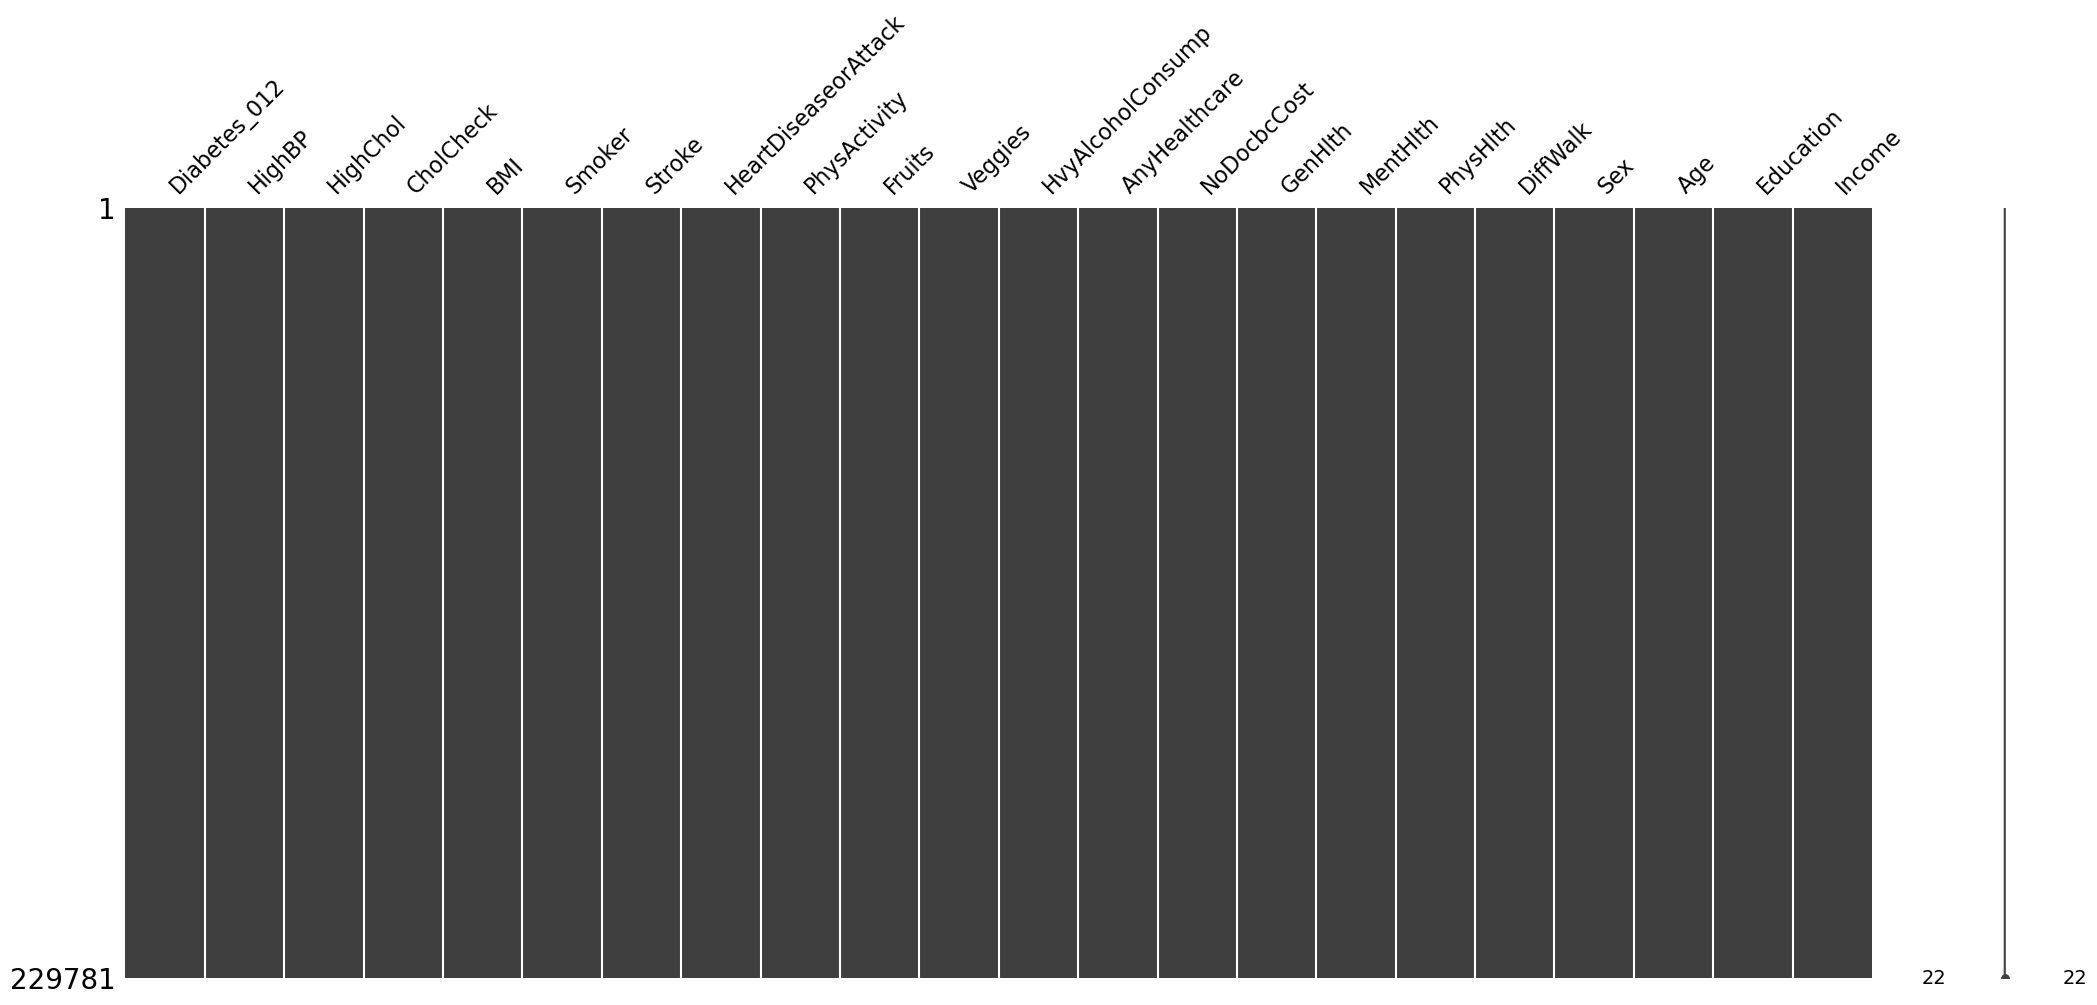

In [11]:
# another way of visualizing missing values
msno.matrix(df)

c:\Users\numan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\numan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\numan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\numan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\numan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\numan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\n

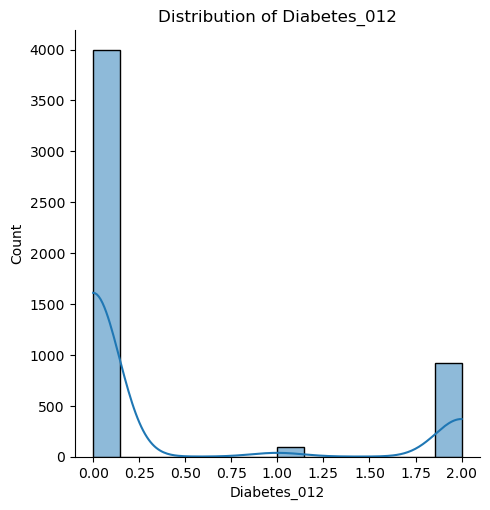

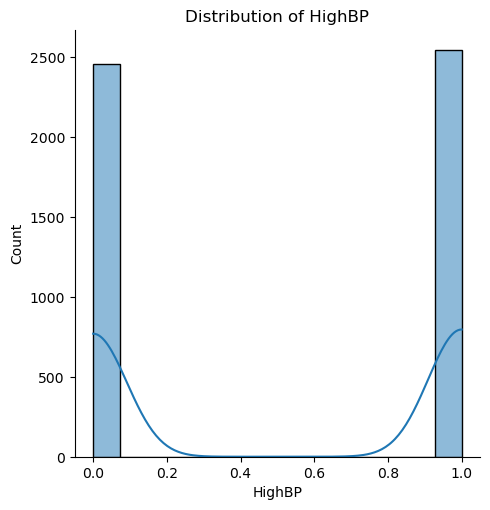

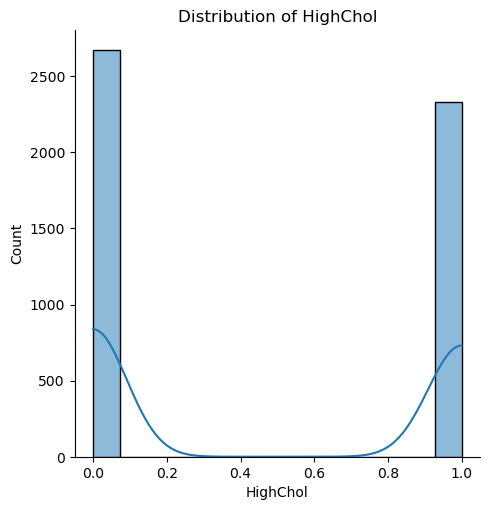

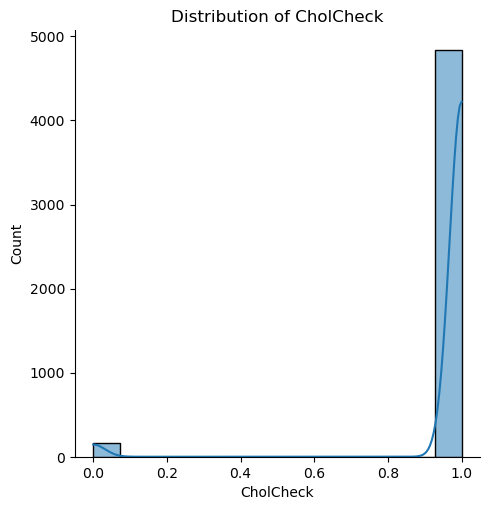

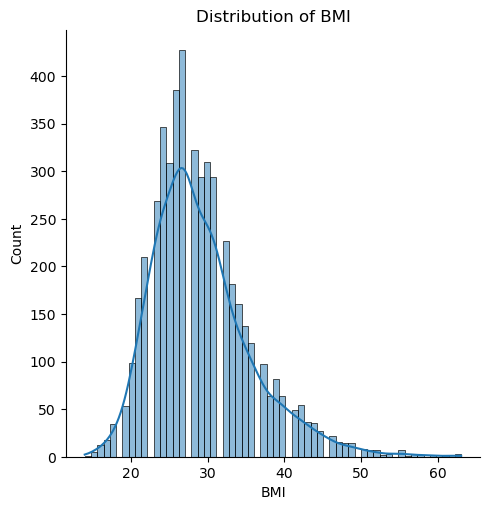

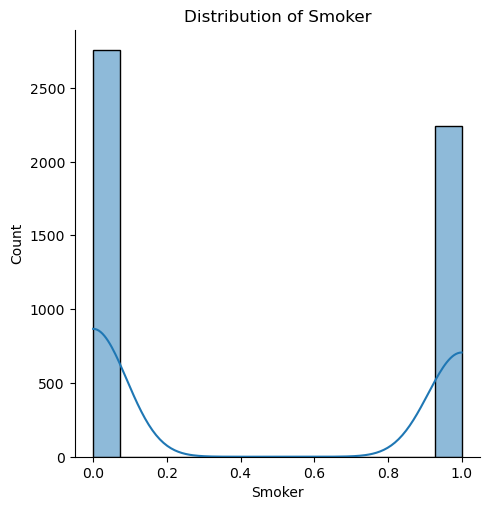

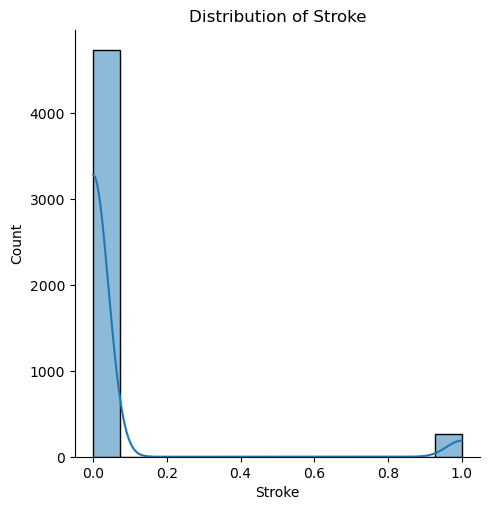

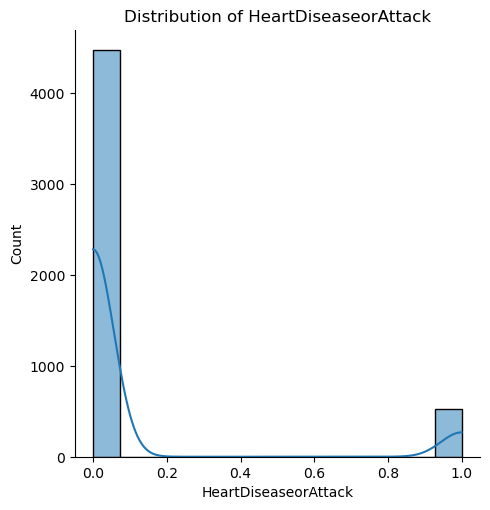

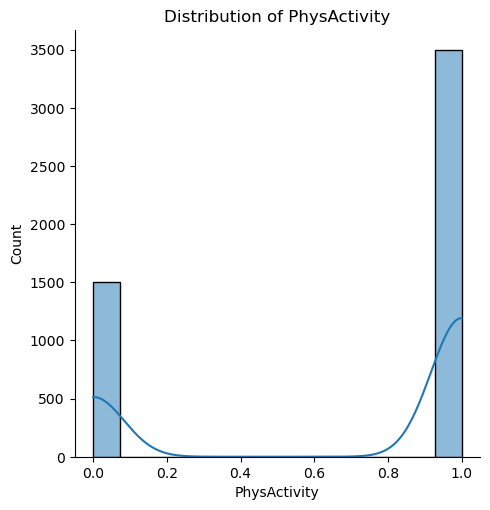

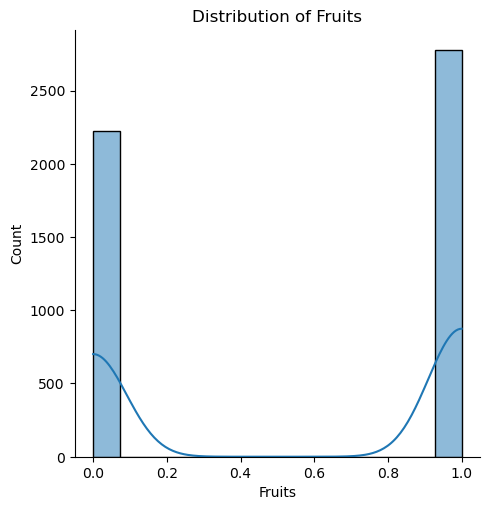

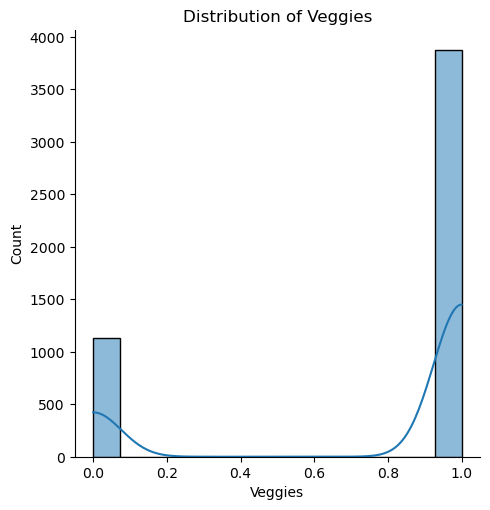

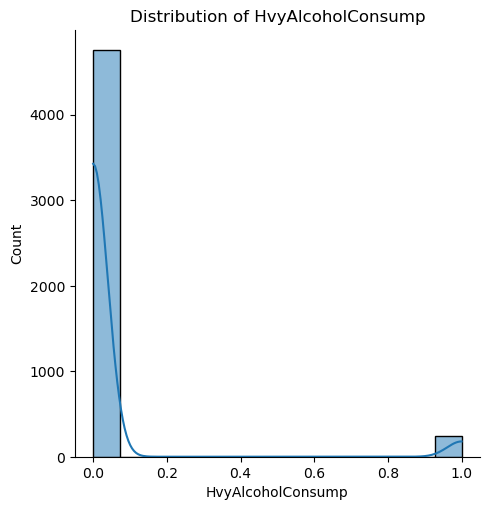

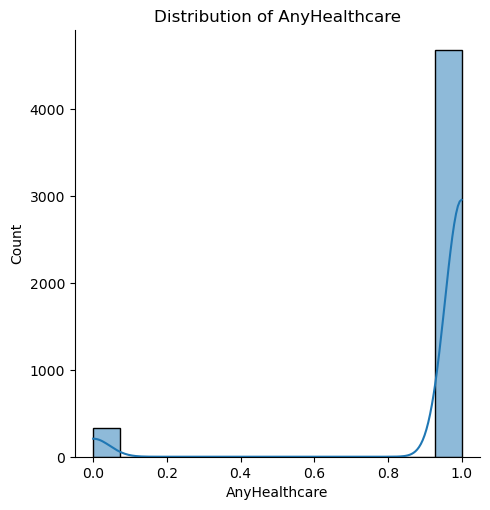

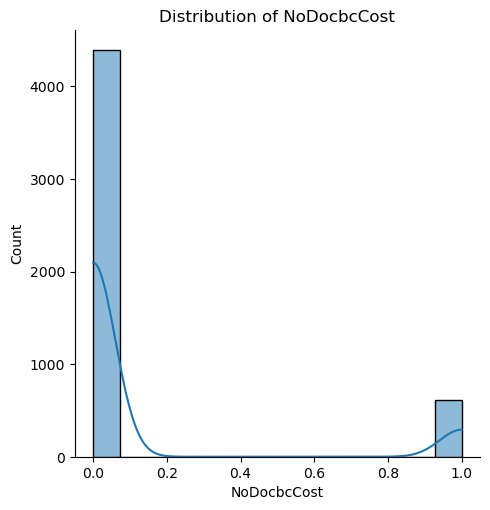

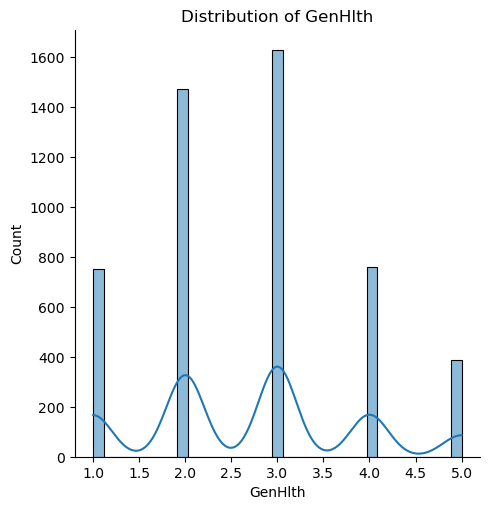

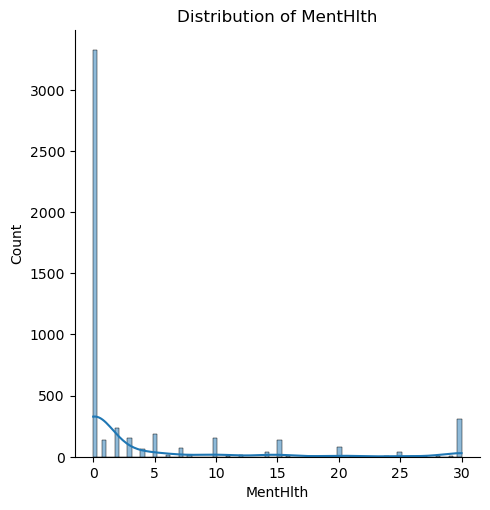

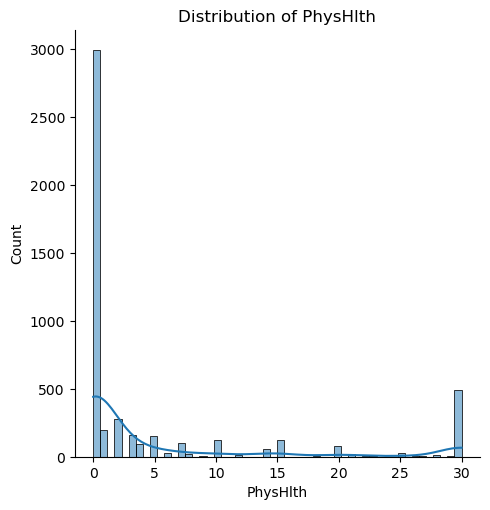

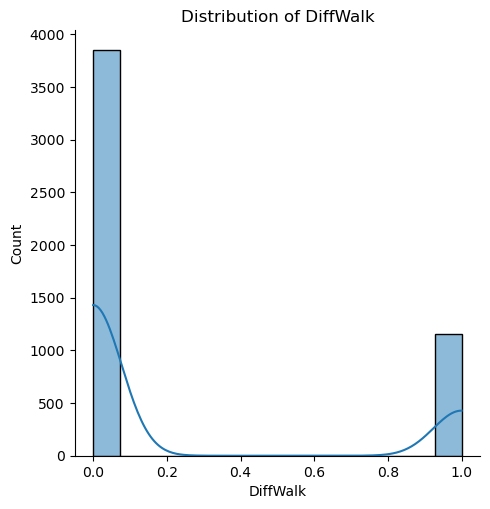

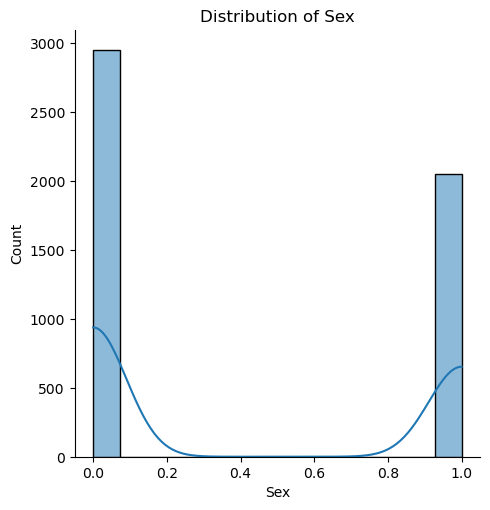

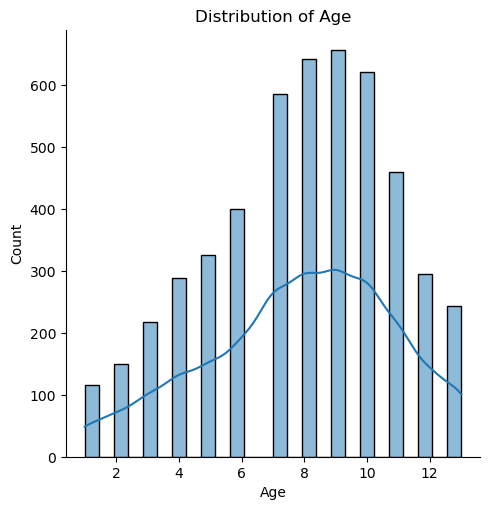

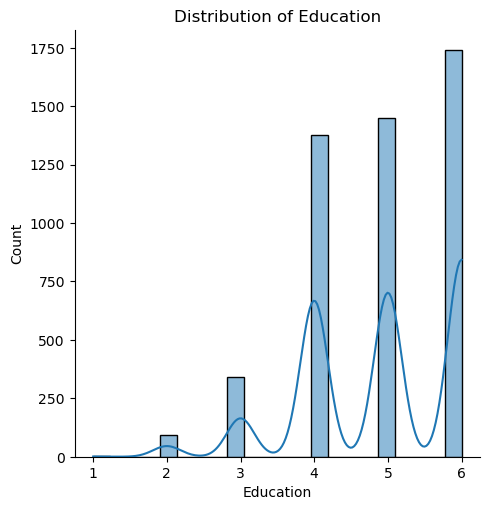

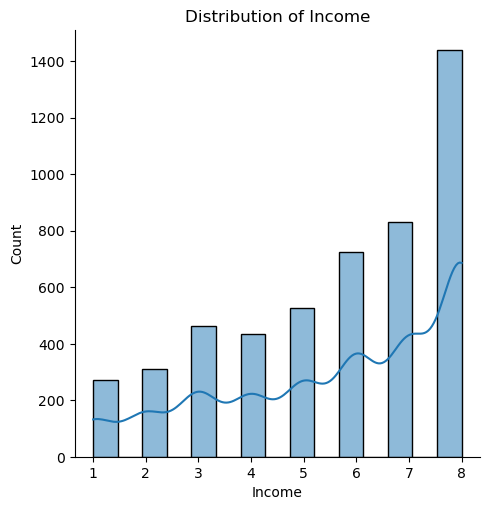

In [12]:
# ploting distubation of column data
col_names = df.columns.tolist()

for col in col_names:
    p = sns.displot(df[:5000], x=col, kde=True)
    plt.title(f"Distribution of {col}")


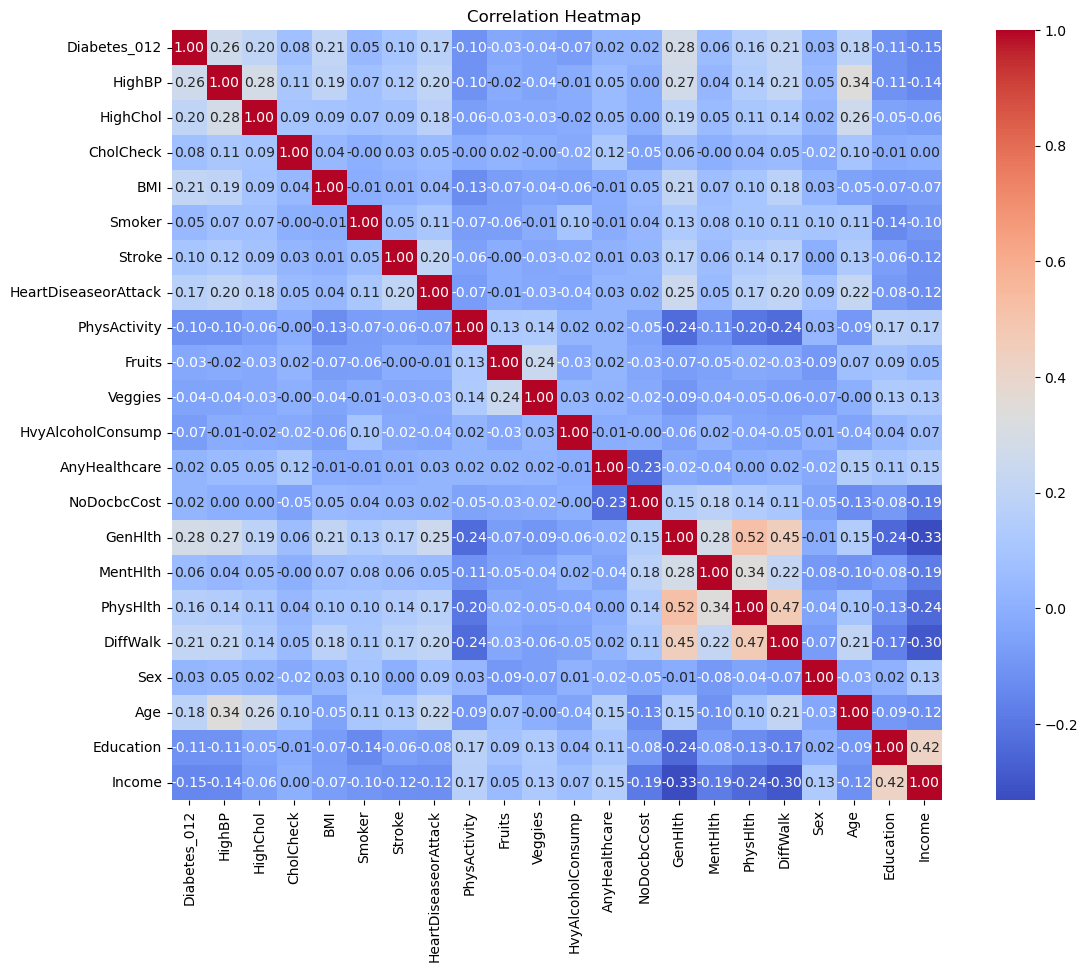

In [17]:
# heat map to check the correlation between columns
plt.figure(figsize=(14, 10))
heatmap_check = sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap="coolwarm", square=True)
heatmap_check.set_title("Correlation Heatmap ")
plt.show()